# Credit Risk Analysis & Loan Default Prediction:
`Authored by:` Muhammad Abuzar\
`DH-ID:` DHC-653\
`Where to contact:` abuzaransri87@gmail.com

## Introduction:
In the banking and financial sector, the process of approving loans is a critical operation. The primary goal of any lender is to minimize financial loss by identifying high-risk applicants before a loan is disbursed. This process is known as Credit Risk Assessment.

With the rise of data-driven decision-making, financial institutions now use Machine Learning models to automate the evaluation of loan applications. By analyzing historical data—including income levels, credit scores, and employment history—these models can identify patterns that human underwriters might miss, leading to faster and more accurate lending decisions.

## Problem Statement:
The challenge is to build a robust predictive model that can determine whether a loan applicant is likely to default on their loan.

A "default" occurs when a borrower fails to make the required payments, leading to significant financial losses for the institution. The objective of this project is to perform a binary classification task where:
* **Class 0:** Represents a "Safe" applicant (Likely to repay).
* **Class 1:** Represents a "Defaulter" (High risk of non-payment).

In [54]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# load dataset
data = pd.read_csv('loan_approval_dataset.csv')
# display first few rows
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [56]:
# check colunns and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [57]:
# check discriptive statistics
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [58]:
# check duplicate rows
data.duplicated().sum()

np.int64(0)

## Dataset Understanding and Description:
The dataset consists of 4,269 records and 13 columns, representing loan applications. It contains a mix of demographic, financial, and credit-related information.

`Key Features Observed:`

- **Financial Metrics:** Annual income and loan amounts are provided in numerical format.
- **Credit History:** The cibil_score ranges from 300 to 900, which is a standard industry measure.
- **Loan Details:** The loan_term ranges from 2 to 20 years.
- **Assets:** Values for residential, commercial, luxury, and bank assets are available to assess the applicant's collateral.
- **Target Variable:** The loan_status column indicates whether a loan was approved or rejected.

## Data Cleaning:
In this stage, the dataset was inspected for inconsistencies, missing values, and duplicates to ensure high data quality for analysis.
- **Missing Values Check:** Using df.info(), it was confirmed that all 13 columns have 4,269 non-null entries. There are no missing values in the dataset.
- **Duplicate Detection:** A check for redundant records was performed, and it was found that there are no duplicate rows in the data.
- **Data Integrity:** The numerical ranges for features like no_of_dependents (0-5) and cibil_score (300-900) were verified to be within normal, realistic limits.

## Exploratory Data Analysis:

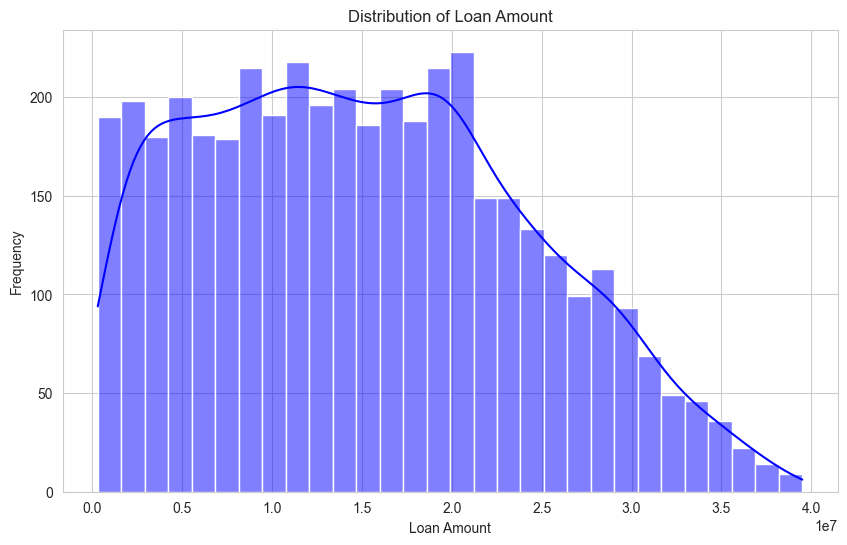

In [59]:
# Set the visual style for the plots
sns.set_style("whitegrid")

# 1. Visualizing Loan Amount Distribution
# Purpose: To see the most common loan sizes requested by applicants.
plt.figure(figsize=(10, 6))
sns.histplot(data[' loan_amount'], kde=True, color='blue', bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show() 

### Insights from Loan Amount Distribution:
- **Most Frequent Loan Tiers:** The majority of applicants are requesting loans in the range of 0.5 Cr, 1 Cr, and 2 Cr. These are the "modes" of our distribution.
- **Common Man’s Range:** There is a significant concentration of applicants below the 2.5 Cr mark, suggesting that the dataset primarily represents mid-to-high level personal or small business loans.
- **Right Skewed Nature:** As the loan amount increases beyond 3 Cr, the number of applicants drops significantly, indicating that very high-value loans are less common in this dataset.

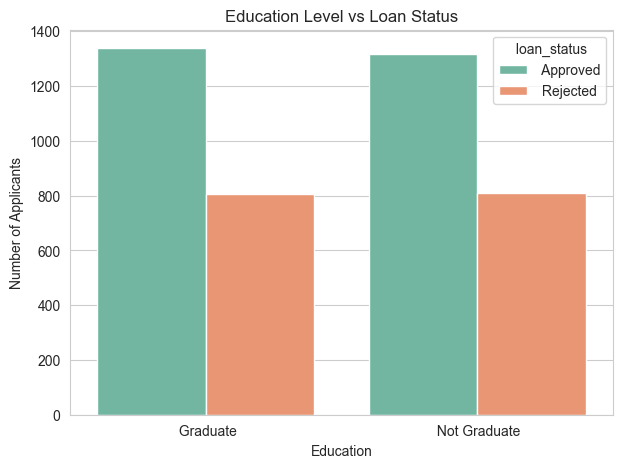

In [60]:
# Education level ka loan status par asar dekhne ke liye
plt.figure(figsize=(7, 5))
sns.countplot(x=' education', hue=' loan_status', data=data, palette='Set2')
plt.title('Education Level vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Number of Applicants')
plt.show()

### Education Level vs. Loan Status Analysis
Based on the visualization, there is no significant difference in the loan approval rates between Graduates and Non-Graduates. Both categories follow a nearly identical pattern:
- Approval Count: In both groups, the number of approved applicants exceeds 1,300.
- Rejection Count: Both groups show a similar rejection count of approximately 800.

**Key Insight:** This indicates that for this specific dataset, Education Level is not a decisive factor for loan approval. The lending institution appears to prioritize other features—such as CIBIL Score or Annual Income—over the educational background of the applicant.

**Implication for Modeling:** During the model training phase, we can expect this feature to have lower "Feature Importance" compared to credit-related metrics.

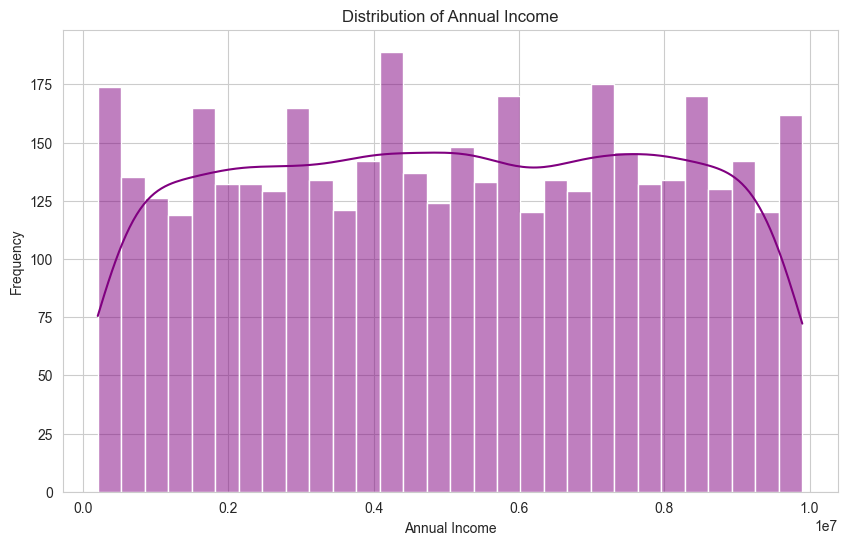

In [61]:
# Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[' income_annum'], kde=True, color='purple', bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

### Annual Income Distribution Analysis
The annual income of applicants was visualized to understand the earning capacity of the target population.

- **Uniform Distribution:** Unlike the loan amount, the annual income is relatively uniformly distributed across the range. This means the dataset contains a balanced number of applicants from low, middle, and high-income brackets (ranging from approximately 0.2e7 to 1.0e7).

- **Peak Earnings:** There is a slight peak around 0.4e7 (40 Lakhs) and 0.7e7 (70 Lakhs), indicating these are common income levels among the applicants.

- **Data Spread:** The frequency remains consistently between 125 to 175 applicants for almost every income bin, showing that the dataset is well-diversified and not biased toward only rich or poor individuals.
- **Key Insight:** Since the income is so evenly spread, it suggests that income alone might not be the strongest predictor for loan status. We need to look at how it interacts with the Loan Amount (Debt-to-Income ratio).

C:\Users\DELL E7480 A&I\AppData\Local\Temp\ipykernel_8520\1576867952.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=' loan_status', y=' income_annum', palette='Set1')


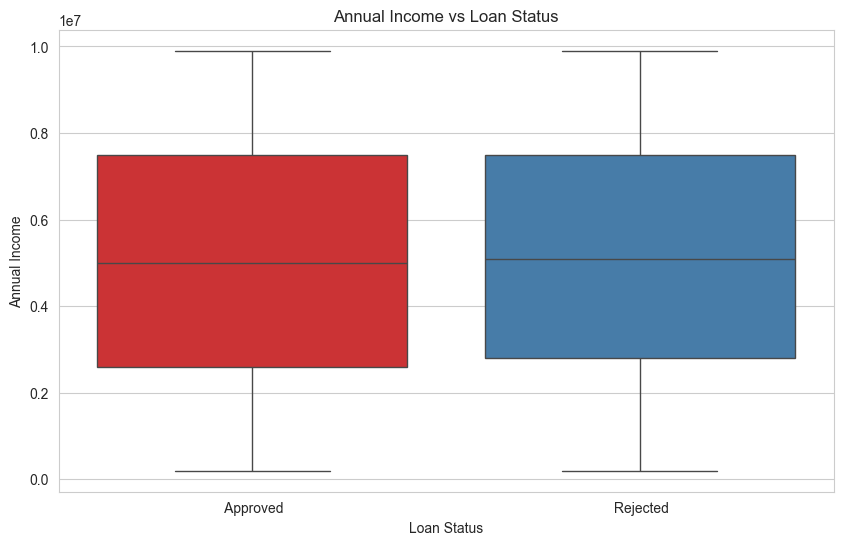

In [62]:
# Annual Income vs Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x=' loan_status', y=' income_annum', palette='Set1')
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

### Annual Income vs. Loan Status Analysis
The box plot comparing annual income across different loan statuses reveals several critical insights:
- **Identical Distributions:** The distribution of income for both Approved and Rejected loans is almost identical. The boxes (representing the Interquartile Range) and the whiskers cover the same spread.

- **Median Income:** The horizontal line inside the boxes (the median) is at the same level (approximately 0.5e7 or 50 Lakhs) for both categories.

- **Key Insight:** This confirms that Annual Income is not a primary discriminator for loan approval in this dataset. High-income individuals are rejected just as frequently as lower-income individuals.

- **Conclusion:** Since income levels do not guarantee approval, the model must rely on other factors—most likely the CIBIL Score or Assets—to determine creditworthiness.

## Feature Engineering:

In [63]:
# remove loan_id column as it is not useful for prediction
data = data.drop(columns=['loan_id'])

In [64]:
# Removing leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Removing leading/trailing spaces from all string values in the dataset
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [65]:
# convert education, self_employed to binary values
data['education'] = data['education'].map({'Graduate': 1, 'Not Graduate': 0})
data['self_employed'] = data['self_employed'].map({'Yes': 1, 'No': 0})

In [67]:
# map loan_status to default prediction values
# create new column is_default 
data['is_default'] = data['loan_status'].map({'Approved': 0, 'Rejected': 1})

# delete loan_status column as it is now represented by is_default
data = data.drop(columns=['loan_status'])

# display first few rows of cleaned dataset
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,is_default
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


Text(0.5, 1.0, 'Correlation Heatmap')

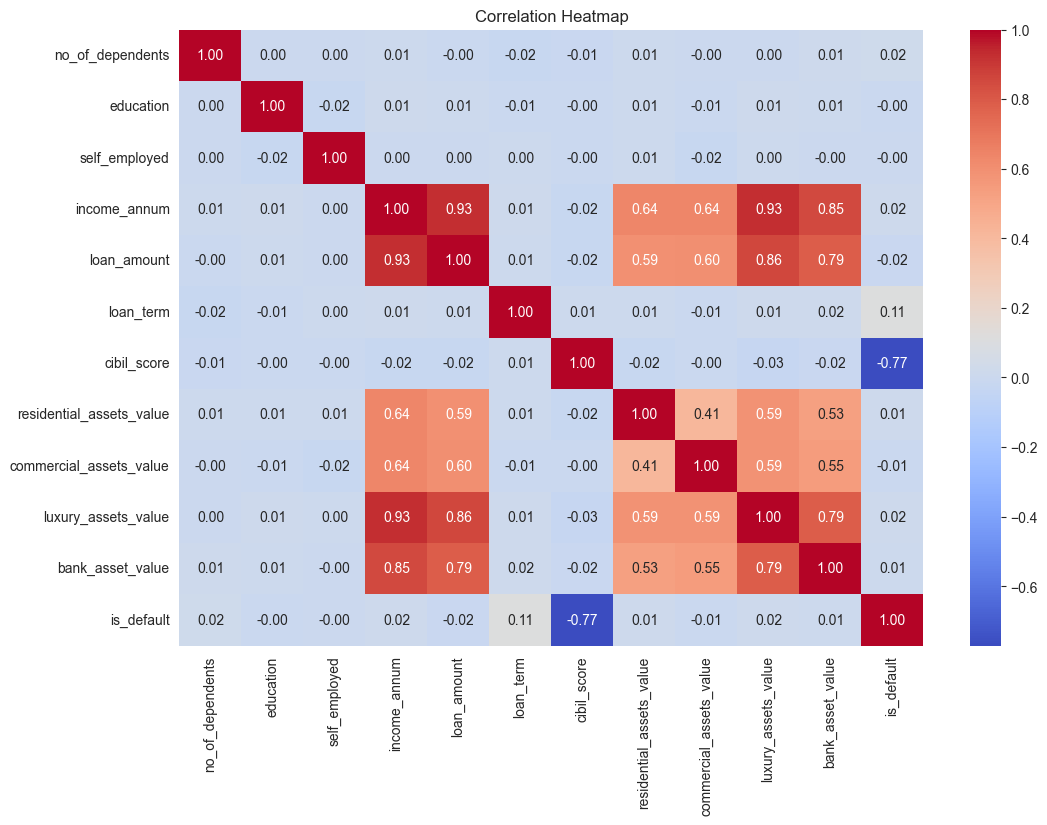

In [68]:
# correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

### Correlation Heatmap Analysis:
- After transforming the data, the heatmap reveals a strong negative correlation of -0.77 between cibil_score and is_default.
- **Significance:** This is the most influential feature in the dataset. A higher CIBIL score significantly reduces the probability of a loan default.
- **Weak Predictors:** Other features like income_annum, education, and no_of_dependents show near-zero correlation with the target variable, indicating they have minimal impact on the default risk.
- **Conclusion:** The model should heavily rely on the CIBIL score for making accurate predictions.

In [70]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'is_default'],
      dtype='object')

In [71]:
# FEATURE AGGREGATION (Combining Assets)
data['total_assets'] = data['residential_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']

# drop individual asset columns as they are now represented by total_assets
data = data.drop(columns=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'])

In [72]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,is_default,total_assets
0,2,1,0,9600000,29900000,12,778,0,50700000
1,0,0,1,4100000,12200000,8,417,1,17000000
2,3,1,0,9100000,29700000,20,506,1,57700000
3,3,1,0,8200000,30700000,8,467,1,52700000
4,5,0,1,9800000,24200000,20,382,1,55000000


## Preparing Data for Machine Learning 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into features and target variable
X = data.drop(columns=['is_default'])
y = data['is_default']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# selective standardization of numerical features
# We scale only large numerical values
cols_to_scale = ['income_annum', 'loan_amount', 'loan_term', 'total_assets']
scaler = StandardScaler()

# Fit only on Training data
scaler.fit(X_train[cols_to_scale])
# Transform both Training and Testing data
X_train.loc[:, cols_to_scale] = scaler.transform(X_train[cols_to_scale])
X_test.loc[:, cols_to_scale] = scaler.transform(X_test[cols_to_scale])

C:\Users\DELL E7480 A&I\AppData\Local\Temp\ipykernel_8520\2635118750.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.00950021  1.61417128 -1.51589075 ...  1.25848241  0.68938023
  0.40482913]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, cols_to_scale] = scaler.transform(X_train[cols_to_scale])
C:\Users\DELL E7480 A&I\AppData\Local\Temp\ipykernel_8520\2635118750.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.62477248  2.07712843 -1.35415691 ...  0.5986968   0.68696138
  0.23460543]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, cols_to_scale] = scaler.transform(X_train[cols_to_scale])
C:\Users\DELL E7480 A&I\AppData\Local\Temp\ipykernel_8520\2635118750.py:9: FutureWarning: Setting an item of incompatible dtype is

In [ ]:
# check scaled features
X_train.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets
1675,5,0,0,1.009500,1.624772,-0.860003,568,0.601127
1164,0,0,1,1.614171,2.077128,0.188894,710,2.428704
192,1,1,0,-1.515891,-1.354157,-0.510371,682,-1.313477
910,2,1,1,-0.057566,-0.228784,1.237791,754,0.135274
567,5,1,1,-0.733375,-0.449445,0.188894,441,-0.627496


In [77]:
# check shape of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (3415, 8) (3415,)
Testing set shape: (854, 8) (854,)


## Logistic Regression:

In [87]:
# import logistic regression mode and evaluate matrixes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# call logistic regression model
lr_model = LogisticRegression(random_state=42)
# fit model on training data
lr_model.fit(X_train, y_train)

C:\Users\DELL E7480 A&I\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [88]:
# predict on test data
y_pred = lr_model.predict(X_test)

In [89]:
# check confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[497  39]
 [ 42 276]]


In [90]:
# check accuracy score and classification report
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.905152224824356
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.87      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.91       854



In [91]:
# import precision, recall, f1_score for more detailed evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision Score: 0.8761904761904762
Recall Score: 0.8679245283018868
F1 Score: 0.8720379146919431


### Logistic Regression Performance Summary
The Logistic Regression model was evaluated using a 20% hold-out test set, yielding the following results:

- Overall Accuracy: The model achieved an impressive accuracy of 90.5%, correctly predicting the default risk for the vast majority of applicants.

- Precision (Class 1): With a precision of 0.88, the model is highly reliable when it flags an applicant as a "Default Risk," meaning there are very few false alarms.

- Recall (Class 1): The recall of 0.87 indicates that the model successfully identified 87% of all actual defaulters in the dataset.

- F1-Score: A balanced F1-score of 0.87 for the minority class (Defaulters) confirms that the model is robust and maintains a good trade-off between precision and recall.
- Conclusion: The model shows high predictive power. Since the recall for defaulters is strong (87%), it is a safe choice for the bank to minimize financial risk.

## Decision Tree Classifier:

In [92]:
# import decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
# call decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
# fit model on training data
dt_model.fit(X_train, y_train)
# predict on test data
y_pred_dt = dt_model.predict(X_test)

In [93]:
# check confusion matrix, accuracy, classification report for decision tree model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Confusion Matrix:
 [[531   5]
 [  6 312]]
Accuracy Score: 0.9871194379391101
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       536
           1       0.98      0.98      0.98       318

    accuracy                           0.99       854
   macro avg       0.99      0.99      0.99       854
weighted avg       0.99      0.99      0.99       854



In [94]:
# check precision, recall, f1_score for decision tree model
print("Precision Score:", precision_score(y_test, y_pred_dt))
print("Recall Score:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

Precision Score: 0.9842271293375394
Recall Score: 0.9811320754716981
F1 Score: 0.9826771653543307


### Decision Tree Performance Summary:
- Overall Accuracy: The model achieved an outstanding 98.7% accuracy, which is nearly perfect for a classification task.
- Precision (98.4%): When the model predicts a default, it is correct 98.4% of the time. This minimizes "False Alarms" for the bank.
- Recall (98.1%): The model successfully identifies 98.1% of all actual defaulters. This is the most important metric for a bank because it means almost no risky loans are slipping through the cracks.
- F1-Score (98.2%): The high F1-score confirms a near-perfect balance between catching defaulters and being accurate about it.
- Final Verdict: The Decision Tree is clearly the superior model for this dataset. It captured complex patterns (likely involving the interaction between CIBIL score and assets) that the linear Logistic Regression model missed.

C:\Users\DELL E7480 A&I\AppData\Local\Temp\ipykernel_8520\4118572891.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


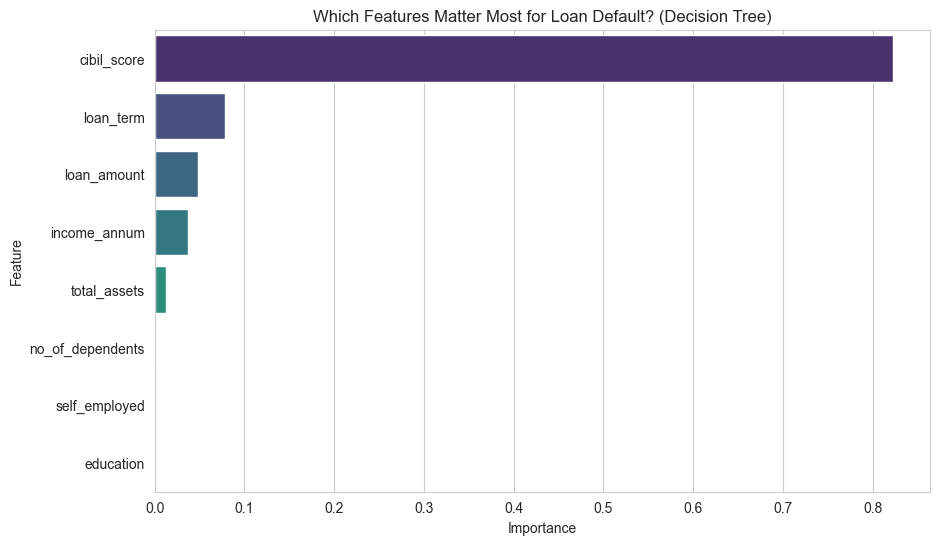

In [95]:
# Getting feature importances from the decision tree
importances = dt_model.feature_importances_
feature_names = X.columns

# Creating a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Which Features Matter Most for Loan Default? (Decision Tree)')
plt.show()

### Final Insights: Feature Importance Analysis
The feature importance plot for the Decision Tree model confirms why it achieved such high accuracy compared to Logistic Regression:
- **Dominant Predictor (CIBIL Score):** With an importance score of over 0.8 (80%), cibil_score is the primary factor driving the model's decisions. This matches our earlier correlation finding of -0.77.
- **Secondary Factors:** Features like loan_term and loan_amount play a minor but supporting role. This suggests that while credit history is king, the duration and size of the debt also influence default risk.
- **Irrelevant Features:** Education, self-employment status, and the number of dependents have almost zero importance. This validates your initial observation that a person's degree or family size doesn't necessarily dictate their intent to repay a loan.